In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
from pmdarima.arima import ndiffs, nsdiffs


import yfinance as yf
yf.pdr_override()

In [56]:
# getting Chicago SRW Wheat Futures Close price from yahoo finance and saving to dataframe
df = yf.download('ZW=F', start = '2006-01-01', end = '2022-06-04')['Close'].to_frame()

[*********************100%***********************]  1 of 1 completed


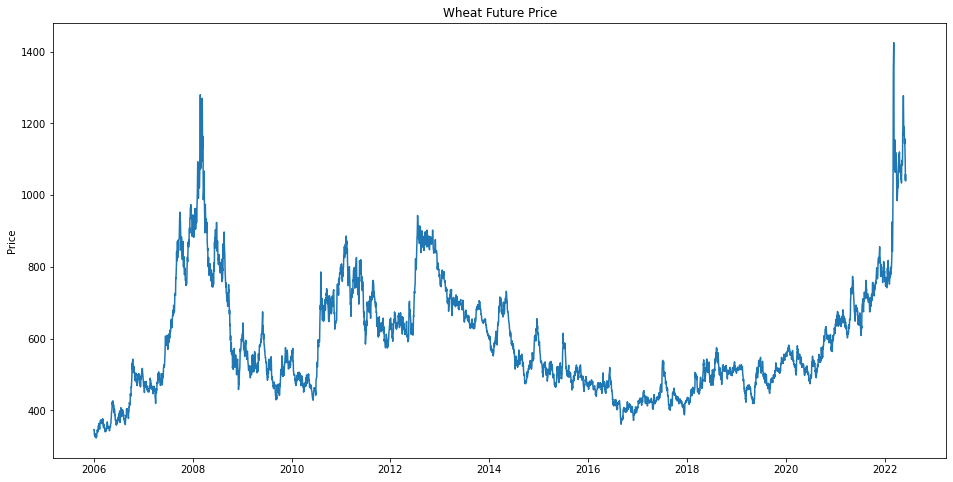

In [57]:

plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Wheat Future Price')
plt.ylabel('Price')
plt.show()


In [58]:
auto_arima = pm.auto_arima(df['Close'], 
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4133
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -16985.645
Date:                Mon, 06 Jun 2022   AIC                          33981.290
Time:                        15:07:00   BIC                          34012.923
Sample:                             0   HQIC                         33992.485
                               - 4133                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4002      0.083      4.832      0.000       0.238       0.563
ma.L1         -0.3416      0.084     -4.055      0.000      -0.507      -0.176
ma.L2         -0.0084      0.009     -0.947      0.344      -0.026       0.009
ma.L3         -0.0749      0.006    -11.725      0.000      -0.087      -0.062
sigma2       217.8112      1.518    143.468      0.000     214.836     220.787
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             85598.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
auto_arima = pm.auto_arima(df['Close'], 
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4133
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -16985.645
Date:                Mon, 06 Jun 2022   AIC                          33981.290
Time:                        15:07:14   BIC                          34012.923
Sample:                             0   HQIC                         33992.485
                               - 4133                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4002      0.083      4.832      0.000       0.238       0.563
ma.L1         -0.3416      0.084     -4.055      0.000      -0.507      -0.176
ma.L2         -0.0084      0.009     -0.947      0.344      -0.026       0.009
ma.L3         -0.0749      0.006    -11.725      0.000      -0.087      -0.062
sigma2       217.8112      1.518    143.468      0.000     214.836     220.787
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             85598.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
print("Suggested # of differences (ADF):", ndiffs(df['Close'], test='adf'))
print("Suggested # of differences (KPSS):", ndiffs(df['Close'], test='kpss'))
print("Suggested # of differences (PP):", ndiffs(df['Close'], test='pp'))

Suggested # of differences (ADF): 1
Suggested # of differences (KPSS): 1
Suggested # of differences (PP): 1


In [61]:
print("Suggested # of differences (OSCB):", nsdiffs(df['Close'], m=12, test='ocsb'))
print("Suggested # of differences (CH):", nsdiffs(df['Close'], m=12, test='ch'))

Suggested # of differences (OSCB): 0
Suggested # of differences (CH): 0


/Users/rishi/miniforge3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [62]:
kpss_diffs = ndiffs(df['Close'], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df['Close'], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print("Estimated differencing term:", n_diffs)

Estimated differencing term: 1


In [63]:
train_len = int(df.shape[0] * 0.8)
train_data, test_data = df[:train_len], df[train_len:]

y_train = train_data['Close'].values
y_test = test_data['Close'].values

print("train samples:" , train_len)
print("test samples", df.shape[0] - train_len)

train samples: 3306
test samples 827


In [64]:
auto = pm.auto_arima(y_train, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26698.937, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26729.950, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26727.791, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26727.241, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26727.982, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26717.524, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26716.513, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26699.821, Time=1.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26699.747, Time=1.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26725.781, Time=0.72 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26717.655, Time=0.88 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26716.768, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26700.636, Time=1.54 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=26696.965, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0

In [65]:
print(auto.order)

(2, 1, 2)


In [66]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)
    
print("Mean squared error:", mean_squared_error(y_test, forecasts))
print("SMAPE:", smape(y_test, forecasts))
print ("Forecast:", forecasts[-1])

Mean squared error: 339.93609529151973
SMAPE: 1.53704126024704
Forecast: 1057.759420777926


In [67]:
x = np.arange(df.shape[0])

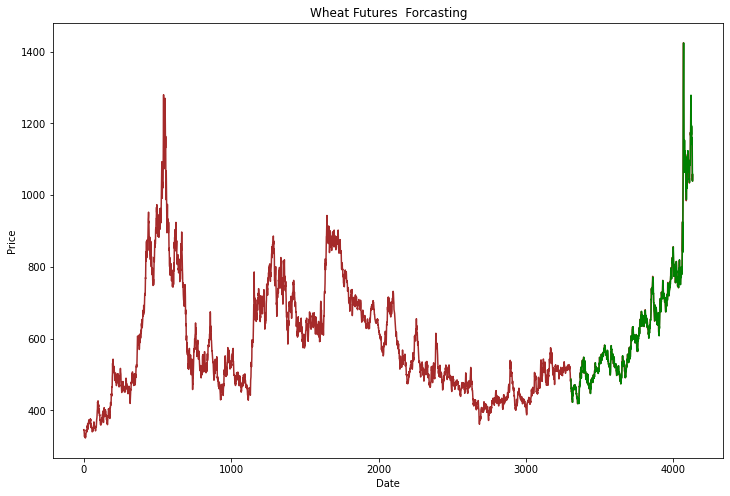

In [69]:
plt.figure(figsize=(12,8))
plt.plot(x, df['Close'],c = "brown" ,label='Actual')
plt.plot(x[train_len:], forecasts, c = "green", label='Forecast')


plt.title("Wheat Futures " + ' Forcasting')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [70]:
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

In [72]:
model.save('wheat_arima.pkl')

AttributeError: 'ARIMA' object has no attribute 'save'